# Exploratory data analysis
<input type="checkbox"> Import data <br>
<input type="checkbox"> Prepare data for further analysis <br>
<input type="checkbox"> Analyzing datasets <br>
<input type="checkbox"> Summarize the main characteristics <br>

In [1]:
import os,sys
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
sns.set()
# sns.set(style="darkgrid")
plt.style.use('ggplot')

## Import data from online source

In [2]:
data_temp = pd.read_html("https://docs.google.com/spreadsheets/d/1yZv9w9zRKwrGTaR-YzmAqMefw4wMlaXocejdxZaTs6w/htmlview?usp=sharing&sle=true#",
                   header=1,index_col=0)

**There are multiple spreadsheets for each day. However, we can use the last update of the day as the data source for that particular date. Hence, a flitering is required.**

### Check whether the current spreadsheet is dupilcate for that day. 
- Take the last update as the data source

In [3]:
date_exist = []

In [4]:
for sheet in data_temp:
    temp = pd.DataFrame(sheet)
    if temp.columns.values[2] != 'Last Update' : 
        temp = temp.rename(columns = {temp.columns.values[2]:'Last Update'})
    if temp.columns.values[1] != 'Country' : 
        temp = temp.rename(columns = {temp.columns.values[1]:'Country'})
    curr_date_sheet = pd.to_datetime(temp['Last Update'].unique()[0]).date()
    if len(date_exist) < 1 :
        data = temp
        date_exist.append(curr_date_sheet)
    elif (curr_date_sheet in date_exist) == False :
        data = data.append(temp,sort=False)
        date_exist.append(curr_date_sheet)

In [5]:
date_exist

[datetime.date(2020, 2, 1),
 datetime.date(2020, 1, 31),
 datetime.date(2020, 1, 30),
 datetime.date(2020, 1, 29),
 datetime.date(2020, 1, 28),
 datetime.date(2020, 1, 27),
 datetime.date(2020, 1, 26),
 datetime.date(2020, 1, 25),
 datetime.date(2020, 1, 24),
 datetime.date(2020, 1, 23),
 datetime.date(2020, 1, 22),
 datetime.date(2020, 1, 21)]

### Adjust data properties and correct some typo errors

In [6]:
data = data.reset_index(drop=True)
data['Last Update'] = data['Last Update'].apply(pd.to_datetime)

In [7]:
data.head()

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Suspected,Demised
0,Hubei,Mainland China,2020-02-01 23:33:00,9074.0,294.0,215.0,NaN,NaN
1,Zhejiang,Mainland China,2020-02-02 02:13:00,661.0,0.0,23.0,NaN,NaN
2,Guangdong,Mainland China,2020-02-02 01:23:00,604.0,0.0,14.0,NaN,NaN
3,Henan,Mainland China,2020-02-02 00:53:00,493.0,2.0,4.0,NaN,NaN
4,Hunan,Mainland China,2020-02-02 01:53:00,463.0,0.0,8.0,NaN,NaN


In [8]:
data['Country'].unique()

array(['Mainland China', 'Japan', 'Thailand', 'Singapore', 'South Korea',
       'Hong Kong', 'Taiwan', 'Germany', 'Malaysia', 'Macau', 'France',
       'Vietnam', 'Australia', 'United Arab Emirates', 'Canada', 'Italy',
       'Philippines', 'Russia', 'UK', 'US', 'Cambodia', 'Finland',
       'India', 'Nepal', 'Spain', 'Sri Lanka', 'Sweden', 'Ivory Coast',
       'Mexico', 'Brazil', 'Colombia', 'China', 'United States'],
      dtype=object)

In [9]:
data.loc[data['Country'] == 'Mainland China','Country'] = 'China'
data.loc[data['Country'] == 'US','Country'] = 'United States'

In [10]:
data['Country'].unique()

array(['China', 'Japan', 'Thailand', 'Singapore', 'South Korea',
       'Hong Kong', 'Taiwan', 'Germany', 'Malaysia', 'Macau', 'France',
       'Vietnam', 'Australia', 'United Arab Emirates', 'Canada', 'Italy',
       'Philippines', 'Russia', 'UK', 'United States', 'Cambodia',
       'Finland', 'India', 'Nepal', 'Spain', 'Sri Lanka', 'Sweden',
       'Ivory Coast', 'Mexico', 'Brazil', 'Colombia'], dtype=object)

In [11]:
data['Province/State'].unique()

array(['Hubei', 'Zhejiang', 'Guangdong', 'Henan', 'Hunan', 'Anhui',
       'Jiangxi', 'Chongqing', 'Jiangsu', 'Sichuan', 'Shandong',
       'Beijing', 'Shanghai', 'Fujian', 'Shaanxi', 'Guangxi', 'Hebei',
       'Heilongjiang', 'Yunnan', 'Liaoning', 'Hainan', 'Shanxi',
       'Tianjin', 'Gansu', 'Guizhou', 'Ningxia', 'Inner Mongolia',
       'Jilin', 'Xinjiang', nan, 'Hong Kong', 'Taiwan', 'Qinghai',
       'Macau', 'New South Wales', 'Victoria', 'Queensland', 'Ontario',
       'Chicago, IL', 'South Australia', 'British Columbia', 'Tibet',
       'Boston, MA', 'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA',
       'Seattle, WA', 'Tempe, AZ', 'Washington', 'Illinois', 'California',
       'Arizona', 'Bavaria', 'Chicago'], dtype=object)

In [12]:
data[data['Province/State'] == 'China'] = 'NaN'
data[data['Province/State'] == 'United States'] = 'NaN'
data[data['Province/State'] == None] = 'NaN'

In [13]:
data['Province/State'].unique()

array(['Hubei', 'Zhejiang', 'Guangdong', 'Henan', 'Hunan', 'Anhui',
       'Jiangxi', 'Chongqing', 'Jiangsu', 'Sichuan', 'Shandong',
       'Beijing', 'Shanghai', 'Fujian', 'Shaanxi', 'Guangxi', 'Hebei',
       'Heilongjiang', 'Yunnan', 'Liaoning', 'Hainan', 'Shanxi',
       'Tianjin', 'Gansu', 'Guizhou', 'Ningxia', 'Inner Mongolia',
       'Jilin', 'Xinjiang', nan, 'Hong Kong', 'Taiwan', 'Qinghai',
       'Macau', 'New South Wales', 'Victoria', 'Queensland', 'Ontario',
       'Chicago, IL', 'South Australia', 'British Columbia', 'Tibet',
       'Boston, MA', 'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA',
       'Seattle, WA', 'Tempe, AZ', 'Washington', 'Illinois', 'California',
       'Arizona', 'Bavaria', 'Chicago'], dtype=object)

## EDA

In [14]:
date_exist[0]

datetime.date(2020, 2, 1)

In [15]:
latest_update = data.loc[data['Last Update'].dt.date == date_exist[0]]

In [16]:
latest_update.groupby(['Country','Province/State']).sum()

Last Update  Confirmed  Deaths  \
Country       Province/State                                            
Australia     New South Wales  2020-02-01 18:12:00        4.0     0.0   
              Queensland       2020-02-01 18:12:00        3.0     0.0   
              South Australia  2020-02-01 18:12:00        1.0     0.0   
              Victoria         2020-02-01 18:12:00        4.0     0.0   
Canada        British Columbia 2020-02-01 18:12:00        1.0     0.0   
              Ontario          2020-02-01 18:12:00        3.0     0.0   
China         Chongqing        2020-02-01 23:43:00      262.0     1.0   
              Gansu            2020-02-01 15:43:00       40.0     0.0   
              Hubei            2020-02-01 23:33:00     9074.0   294.0   
              Liaoning         2020-02-01 15:23:00       64.0     0.0   
              Qinghai          2020-02-01 05:37:00        9.0     0.0   
              Shanxi           2020-02-01 23:33:00       56.0     0.0   
              Tibet            2020-02-01 01:52:00        1.0     0.0   
              Yunnan           2020-02-01 15:53:00       93.0     0.0   
United States Boston, MA       2020-02-01 19:43:00        1.0     0.0   
              Chicago, IL      2020-02-01 19:43:00        2.0     0.0   
              Los Angeles, CA  2020-02-01 19:53:00        1.0     0.0   
              Orange, CA       2020-02-01 19:53:00        1.0     0.0   
              Santa Clara, CA  2020-02-01 19:53:00        1.0     0.0   
              Seattle, WA      2020-02-01 19:43:00        1.0     0.0   
              Tempe, AZ        2020-02-01 19:43:00        1.0     0.0   

                                Recovered  Suspected  Demised  
Country       Province/State                                   
Australia     New South Wales         2.0          0        0  
              Queensland              0.0          0        0  
              South Australia         0.0          0        0  
              Victoria                0.0          0        0  
Canada        British Columbia        0.0          0        0  
              Ontario                 0.0          0        0  
China         Chongqing               3.0          0        0  
              Gansu                   0.0          0        0  
              Hubei                 215.0          0        0  
              Liaoning                1.0          0        0  
              Qinghai                 0.0          0        0  
              Shanxi                  1.0          0        0  
              Tibet                   0.0          0        0  
              Yunnan                  2.0          0        0  
United States Boston, MA              0.0          0        0  
              Chicago, IL             0.0          0        0  
              Los Angeles, CA         0.0          0        0  
              Orange, CA              0.0          0        0  
              Santa Clara, CA         0.0          0        0  
              Seattle, WA             0.0          0        0  
              Tempe, AZ               0.0          0        0

## Data Visualisation

In [43]:
data_countries_progession = data.groupby(['Country','Last Update']).sum()

In [50]:
data_countries_progession['cumsum_confirmed'] = data_countries_progession.groupby('Country')['Confirmed'].cumsum()

In [51]:
data_countries_progession['cumsum_confirmed']

Country               Last Update        
Australia             2020-01-23 12:00:00       0.0
                      2020-01-25 12:00:00       4.0
                      2020-01-26 23:00:00       8.0
                      2020-01-27 20:30:00      13.0
                      2020-01-28 23:00:00      18.0
                      2020-01-29 21:00:00      25.0
                      2020-01-30 21:30:00      34.0
                      2020-01-31 19:00:00      43.0
                      2020-02-01 18:12:00      55.0
Brazil                2020-01-23 12:00:00       0.0
Cambodia              2020-01-27 20:30:00       1.0
                      2020-01-28 23:00:00       2.0
                      2020-01-29 21:00:00       3.0
                      2020-01-30 21:30:00       4.0
                      2020-01-31 08:15:00       5.0
                      2020-01-31 19:00:00       6.0
Canada                2020-01-26 23:00:00       1.0
                      2020-01-27 20:30:00       2.0
                      

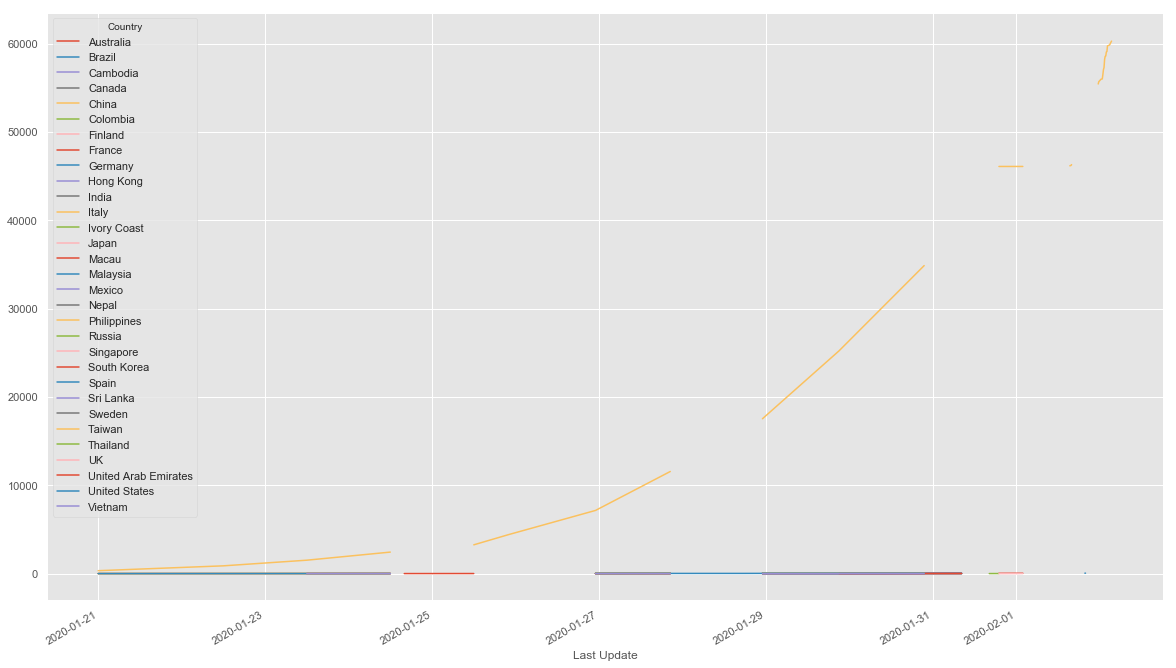

In [52]:
pivoted = pd.pivot_table(data_countries_progession, values='cumsum_confirmed', columns='Country', index='Last Update')
pivoted.plot(figsize=(20,12))

In [54]:
data_countries_progession

Province/State  \
Country              Last Update                                                              
Australia            2020-01-23 12:00:00                                                  0   
                     2020-01-25 12:00:00                                                  0   
                     2020-01-26 23:00:00                                                  0   
                     2020-01-27 20:30:00                            New South WalesVictoria   
                     2020-01-28 23:00:00                            New South WalesVictoria   
                     2020-01-29 21:00:00                  New South WalesVictoriaQueensland   
                     2020-01-30 21:30:00                  New South WalesVictoriaQueensland   
                     2020-01-31 19:00:00                  New South WalesVictoriaQueensland   
                     2020-02-01 18:12:00   New South WalesVictoriaQueenslandSouth Australia   
Brazil               2020-01-23 12:00:00                                                  0   
Cambodia             2020-01-27 20:30:00                                                  0   
                     2020-01-28 23:00:00                                                  0   
                     2020-01-29 21:00:00                                                  0   
                     2020-01-30 21:30:00                                                  0   
                     2020-01-31 08:15:00                                                  0   
                     2020-01-31 19:00:00                                                  0   
Canada               2020-01-26 23:00:00                                            Ontario   
                     2020-01-27 20:30:00                                            Ontario   
                     2020-01-28 23:00:00                            OntarioBritish Columbia   
                     2020-01-29 21:00:00                            OntarioBritish Columbia   
                     2020-01-30 21:30:00                            OntarioBritish Columbia   
                     2020-01-31 19:00:00                            OntarioBritish Columbia   
                     2020-02-01 18:12:00                            OntarioBritish Columbia   
China                2020-01-21 00:00:00  ShanghaiYunnanBeijingTaiwanJilinSichuanTianjin...   
                     2020-01-22 12:00:00  AnhuiBeijingChongqingFujianGansuGuangdongGuang...   
                     2020-01-23 12:00:00  AnhuiBeijingChongqingFujianGansuGuangdongGuang...   
                     2020-01-24 12:00:00  HubeiGuangdongZhejiangBeijingChongqingHunanGua...   
                     2020-01-25 12:00:00  GuangdongHenanChongqingHunanAnhuiBeijingSichua...   
                     2020-01-25 22:00:00                                      HubeiZhejiang   
                     2020-01-26 23:00:00  HubeiGuangdongZhejiangHenanChongqingHunanAnhui...   
...                                                                                     ...   
UK                   2020-01-31 19:00:00                                                  0   
                     2020-02-01 01:52:00                                                  0   
United Arab Emirates 2020-01-29 21:00:00                                                  0   
                     2020-01-30 21:30:00                                                  0   
                     2020-01-31 08:15:00                                                  0   
                     2020-01-31 19:00:00                                                  0   
United States        2020-01-21 00:00:00                                         Washington   
                     2020-01-22 12:00:00                                         Washington   
                     2020-01-23 12:00:00                                         Washington   
                     2020-01-24 12:00:00                                  WashingtonChi